In [1]:
# 캐글 데이터 셋
# local에서 작업할때만
!pip install kaggle --upgrade
!pip install kaggle

In [2]:
import os
# os.envion을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME']='guyonglee'
os.environ['KAGGLE_KEY']='f0baa1b8cd94dd6229631c5812942819'

In [3]:
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009


  0%|          | 0.00/25.6k [00:00<?, ?B/s]
100%|██████████| 25.6k/25.6k [00:00<00:00, 3.73MB/s]


In [4]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)
createFolder('./zip')   

In [5]:
import zipfile
fantasy_zip=zipfile.ZipFile('red-wine-quality-cortez-et-al-2009.zip')
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'./zip')

# fantasy_zip.close()

'zip\\winequality-red.csv'

- wine 데이터셋
- fixed acidity(결합산): 와인의 산도를 제어한다.(타르타르산+사과산)
- volatile acidity(휘발성산): 와인향을 결정

In [65]:
import pandas as pd

from glob import glob
# df=pd.read_csv(glob('./zip/*.csv')[0])

df=pd.read_csv('./zip/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [69]:
# https://www.kaggle.com/egemenuurdalg/linear-regression
# 와인의 품질을 0~10 사이의 숫자로 예측
# 회귀분석
from statsmodels.api import OLS, add_constant   # p-value나 회귀계수를 확인할 수 있음.
from sklearn.linear_model import LinearRegression   # 회귀분석 모델
from sklearn.metrics import mean_squared_error  # Error값
from sklearn.datasets import make_regression    # 회귀분석용 가상데이터 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score    # 데이터 나눔
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize     # 정규화

In [8]:
data=df
data.isnull().sum()     # na값 확인

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# x, y데이터 분리
y=data.quality
X=data.drop(['quality'],axis=1)

# 트레이닝, 테스트 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [11]:
# 훈련과 테스트의 x의 열 갯수는 같아야함.
# 훈련테스트의 x, y의 행갯수는 같아야함.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [12]:
# 98.7%의 설명력을 가지고있음
# p-value가 높음으로 제거 후 계산해야함

ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8056.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        10:57:32   Log-Likelihood:                         -1192.1
No. Observations:                1199   AIC:                                      2406.
Df Residuals:                    1188   BIC:                                      2462.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0032      0.019      0.167      0.868      -0.034       0.041
volatile acidity        -1.0221      0.140     -7.276      0.000      -1.298      -0.746
citric acid             -0.1352      0.173     -0.783      0.434      -0.474       0.204
residual sugar           0.0001      0.014      0.010      0.992      -0.027       0.028
chlorides               -1.7809      0.471     -3.778      0.000      -2.706      -0.856
free sulfur dioxide      0.0052      0.003      2.008      0.045       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.364      0.000      -0.005      -0.002
density                  4.2080      0.724      5.809      0.000       2.787       5.629
pH                      -0.4428      0.186     -2.385      0.017      -0.807      -0.079
sulphates                0.7928      0.126      6.295      0.000       0.546       1.040
alcohol                  0.3050      0.020     14.944      0.000       0.265       0.345
==============================================================================
Omnibus:                       26.033   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.079
Skew:                          -0.179   Prob(JB):                     7.29e-10
Kurtosis:                       3.845   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# p-value값이 높은값(일반적으로 0.05) 제거
X.drop(['fixed acidity','citric acid','residual sugar'],axis=1,inplace=True)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [17]:
ls_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8056.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        11:00:56   Log-Likelihood:                         -1192.1
No. Observations:                1199   AIC:                                      2406.
Df Residuals:                    1188   BIC:                                      2462.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0032      0.019      0.167      0.868      -0.034       0.041
volatile acidity        -1.0221      0.140     -7.276      0.000      -1.298      -0.746
citric acid             -0.1352      0.173     -0.783      0.434      -0.474       0.204
residual sugar           0.0001      0.014      0.010      0.992      -0.027       0.028
chlorides               -1.7809      0.471     -3.778      0.000      -2.706      -0.856
free sulfur dioxide      0.0052      0.003      2.008      0.045       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.364      0.000      -0.005      -0.002
density                  4.2080      0.724      5.809      0.000       2.787       5.629
pH                      -0.4428      0.186     -2.385      0.017      -0.807      -0.079
sulphates                0.7928      0.126      6.295      0.000       0.546       1.040
alcohol                  0.3050      0.020     14.944      0.000       0.265       0.345
==============================================================================
Omnibus:                       26.033   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.079
Skew:                          -0.179   Prob(JB):                     7.29e-10
Kurtosis:                       3.845   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_train=add_constant(X_train)
X_test=add_constant(X_test)
ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

C:\Users\baekj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     81.64
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          1.40e-107
Time:                        11:03:35   Log-Likelihood:                -1192.2
No. Observations:                1199   AIC:                             2402.
Df Residuals:                    1190   BIC:                             2448.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5998     12.450      0.691      0.490     -15.826      33.026
volatile acidity        -0.9577      0.117     -8.183      0.000      -1.187      -0.728
chlorides               -1.8862      0.445     -4.236      0.000      -2.760      -1.013
free sulfur dioxide      0.0055      0.003      2.175      0.030       0.001       0.010
total sulfur dioxide    -0.0039      0.001     -4.829      0.000      -0.005      -0.002
density                 -4.4148     12.288     -0.359      0.719     -28.523      19.693
pH                      -0.4222      0.141     -2.993      0.003      -0.699      -0.145
sulphates                0.8023      0.127      6.326      0.000       0.554       1.051
alcohol                  0.2943      0.022     13.283      0.000       0.251       0.338
==============================================================================
Omnibus:                       25.683   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.215
Skew:                          -0.179   Prob(JB):                     1.12e-09
Kurtosis:                       3.835   Cond. No.                     5.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# 상수항(const) 추가됨
X_train

,const,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,1.0,0.490,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
626,1.0,0.600,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
1030,1.0,0.590,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
620,1.0,0.540,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
490,1.0,0.775,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
...,...,...,...,...,...,...,...,...,...
1130,1.0,0.600,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,1.0,0.635,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,1.0,0.620,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,1.0,0.200,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [23]:
print(results.predict(X_test)[0:5])     # 예측값은 소수점
print('-------------------')
print(y_test[0:5])      # 실제 데이터는 정수값

803     5.332023
124     5.038873
350     5.616547
682     5.468969
1326    5.759155
dtype: float64
-------------------
803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64


In [24]:
def rounder(array):
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [27]:
results.predict(X_test)
round(y_test, 0)

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64

In [25]:
ols_pred=results.predict(X_test)
rounded_pred_ols=rounder(ols_pred)

# rme는 낮을수록 좋음
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 0.8276472678623424


In [29]:
lm=LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: ', np.round(lm.coef_,2))   # w값
print('Intercept: ', np.round(lm.intercept_,2))     # b값

X_train.shape

Coefficients:  [ 0.   -0.96 -1.89  0.01 -0.   -4.41 -0.42  0.8   0.29]
Intercept:  8.6


(1199, 9)

In [30]:
preds=lm.predict(X_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.8276472678623424


## 다른 방법으로 작업
### https://www.kaggle.com/henriqueosinski/eda-and-multi-class-classification
### 멀티클래스: 다항분류(레이블결과삽이 3개 이상인 경우)
### 딥러닝에서 사진한장에 여러개의 의미가 부여된것을 멀티클래스라고 하기도함
### (표정레이블, 성별레이블, 머리스타일레이블 등)

In [39]:
!pip install plotly

In [41]:
import numpy as np 
import pandas as pd 
import plotly.express as px     # 플로틀리 라이브러리
from sklearn.neighbors import KNeighborsClassifier      # KNN기법 가까운것에서부터 묶음
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report       # 데이터 분류 리포트
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [34]:
df=data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
px.histogram(df,x = 'quality')

In [43]:
df[df['quality']==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [44]:
df[df['quality']==8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [45]:
df[df['total sulfur dioxide']>=200]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [51]:
tmp=df[df['quality']==3]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.0
mean,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.57000,9.955000,3.0
std,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.12202,0.818009,0.0
min,6.700000,0.440000,0.000000,1.200000,0.061000,3.000000,9.000000,0.994710,3.160000,0.40000,8.400000,3.0
25%,7.150000,0.647500,0.005000,1.875000,0.079000,5.000000,12.500000,0.996150,3.312500,0.51250,9.725000,3.0
50%,7.500000,0.845000,0.035000,2.100000,0.090500,6.000000,15.000000,0.997565,3.390000,0.54500,9.925000,3.0
75%,9.875000,1.010000,0.327500,3.100000,0.143000,14.500000,42.500000,0.998770,3.495000,0.61500,10.575000,3.0
max,11.600000,1.580000,0.660000,5.700000,0.267000,34.000000,49.000000,1.000800,3.630000,0.86000,11.000000,3.0


In [53]:
df['relative sulphur'] = df['free sulfur dioxide']/df['total sulfur dioxide']
print([i for i in df.columns])
fig = px.imshow(df.corr())
fig.show()
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'relative sulphur']


In [54]:
n_neigh = len(np.unique(df['quality']))
y = df.pop('quality')

x = df.values

In [59]:
n_neigh

6

In [56]:
type(x), type(y)

(numpy.ndarray, pandas.core.series.Series)

In [57]:
from sklearn.preprocessing import StandardScaler
SE = StandardScaler()
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)
SE.fit(x_train)
x_train = SE.transform(x_train)
x_test = SE.transform(x_test)

In [58]:
model = KNeighborsClassifier(n_neighbors = n_neigh)
model.fit(x_train,y_train)
print(f'Average K neighbors precision {model.score(x_test,y_test)}')

Average K neighbors precision 0.59


C:\Users\baekj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\baekj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\baekj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.62      0.76      0.68       164
           6       0.57      0.54      0.56       169
           7       0.57      0.42      0.48        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.57      0.59      0.57       400

[[  0   0   0   1   0   0]
 [  0   0   7   6   0   0]
 [  0   1 124  36   3   0]
 [  0   4  64  92   9   0]
 [  0   0   5  23  20   0]
 [  0   0   0   2   3   0]]


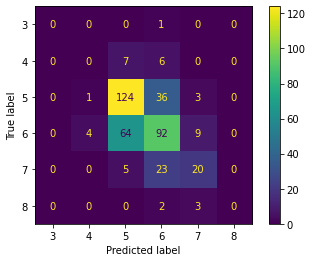

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

prediction = model.predict(x_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
plot_confusion_matrix(model, x_test, y_test) 

In [61]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,relative sulphur
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.323529
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.373134
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.277778
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.283333
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.323529
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.727273
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0.764706
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0.725000
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0.727273


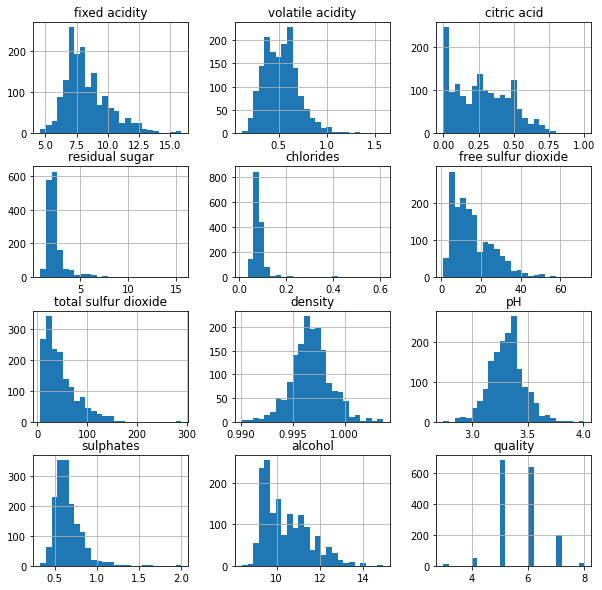

In [67]:
df.hist(bins=25, figsize=(10,10))
plt.show()

<BarContainer object of 1599 artists>

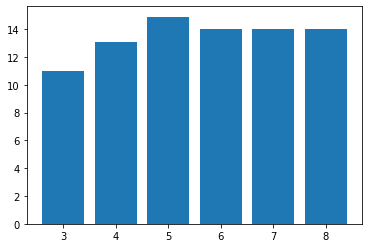

In [68]:
plt.bar(df['quality'],df['alcohol'])

In [ ]:
## 다중공선성 제거해야함(각 x값들끼리의 상관도가 너무 높아서 생기는 문제를 미리 제거)
## 일단 모두 작업

X=df.drop(['quality'], axis=1)
y=df['quality']

In [71]:
# 트레이닝
# 테시트 데이터 분리
# 표준화시켜서
# 트레이닝, 테스트데이터 분리

x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=42)
SE = StandardScaler()
SE.fit(X_train)
x_train = SE.transform(X_train)
x_test = SE.transform(X_test)

NameError: name 'Y' is not defined

In [ ]:
# 회귀분석 # rmse값 출력

# 로지스틱회귀 # rmse값 출력

In [76]:
import numpt as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

def classReport(x,y,pred):


    pred=model.predict(x)
    print(classification_report(y,pred))
    print(confusion_matrix(y,pred))

    print(f'The RMSE ofo sklearn model: {np.sqrt(mean_squared_error(y_test,pred))}')
    print(f'The R2 of sklearn model: {r2_score(y_test,pred)}')

In [77]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
print(f'----Average K neighbors precision---- {model.scroe(x_test,y_test)}\n')

classReport(x_test,y_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'scroe'

In [ ]:
# 로지스틱회귀분석

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

train_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)

from sklearn 